In [1]:
## Importing necessary modules

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import kagglehub
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv("Telco_Customer_Churn.csv")

dataset = pd.get_dummies(dataset, columns=["Churn"],drop_first=True,dtype=int)
train_data = dataset.drop(columns=["Churn_Yes"])
train_labels = dataset["Churn_Yes"]
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels,test_size=0.2,random_state=42)
X_train, Valx_test, y_train, Valy_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [3]:
def data_clean_up(dataset):
    """
    Function to preprocess the data.
    """
    if "customerID" in dataset.columns:
        dataset = dataset.drop(columns=["customerID"])
    columns_to_convert = ['SeniorCitizen', 'tenure','MonthlyCharges','TotalCharges']
    for col in columns_to_convert:
        dataset[col] = pd.to_numeric(dataset[col], errors='coerce')
    encoded_data = pd.get_dummies(dataset, columns=dataset.select_dtypes(include='object').columns)
    encoded_data = encoded_data.fillna(0)
    dataset = encoded_data.astype(int)
    scaler = StandardScaler()
    dataset = scaler.fit_transform(dataset)
    dataset = tf.convert_to_tensor(dataset, dtype=tf.float32)
    return dataset

In [44]:
def print_metrics(model,X,y):
    """
    Prints metrics of accuracy and AUC
    """
    loss, accuracy, auc = model.evaluate(X, y)
    print(f"Test Accuracy: {accuracy}")
    print(f"Test AUC: {auc}")

In [5]:
def plot_loss_curves(history):
    """
    Plot the loss curves to show trends during training.
    """
    epochs = range(1, len(history.history['loss']) + 1)
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.plot(epochs, history.history['loss'], 'r', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'r--', label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Plot 2: Accuracy (Training and Validation)
    plt.subplot(3, 1, 2)
    plt.plot(epochs, history.history['accuracy'], 'g', label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'g--', label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # Plot 3: AUC (Training and Validation)
    plt.subplot(3, 1, 3)
    plt.plot(epochs, history.history['auc'], 'b', label='Training AUC')
    plt.plot(epochs, history.history['val_auc'], 'b--', label='Validation AUC')
    plt.title('AUC Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.legend()
    plt.grid()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

In [6]:
X_train = data_clean_up(X_train)
Valx_test = data_clean_up(Valx_test)

In [7]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, activation='relu')
    ])

model.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy",tf.keras.metrics.AUC(name='auc')])

In [8]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(Valx_test, Valy_test))

Epoch 1/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4980 - auc: 0.4072 - loss: 6.1296 - val_accuracy: 0.5337 - val_auc: 0.4643 - val_loss: 5.3704
Epoch 2/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5002 - auc: 0.4112 - loss: 6.0066 - val_accuracy: 0.5355 - val_auc: 0.4694 - val_loss: 5.2932
Epoch 3/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5172 - auc: 0.4404 - loss: 5.6084 - val_accuracy: 0.5372 - val_auc: 0.4831 - val_loss: 5.0692
Epoch 4/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5192 - auc: 0.4396 - loss: 5.5575 - val_accuracy: 0.5656 - val_auc: 0.5081 - val_loss: 4.6935
Epoch 5/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5567 - auc: 0.4743 - loss: 5.0666 - val_accuracy: 0.5851 - val_auc: 0.5302 - val_loss: 4.3120
Epoch 6/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5696 - auc: 0.4837 - loss: 4.8772 - val_accuracy: 0.5904 - val_auc: 0.5285 - val_loss: 4.3975
Epoch 7/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
print_metrics(Valx_test, Valy_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6680 - auc: 0.6546 - loss: 3.0732 
Test Accuracy: 0.6702127456665039
Test AUC: 0.6494770050048828


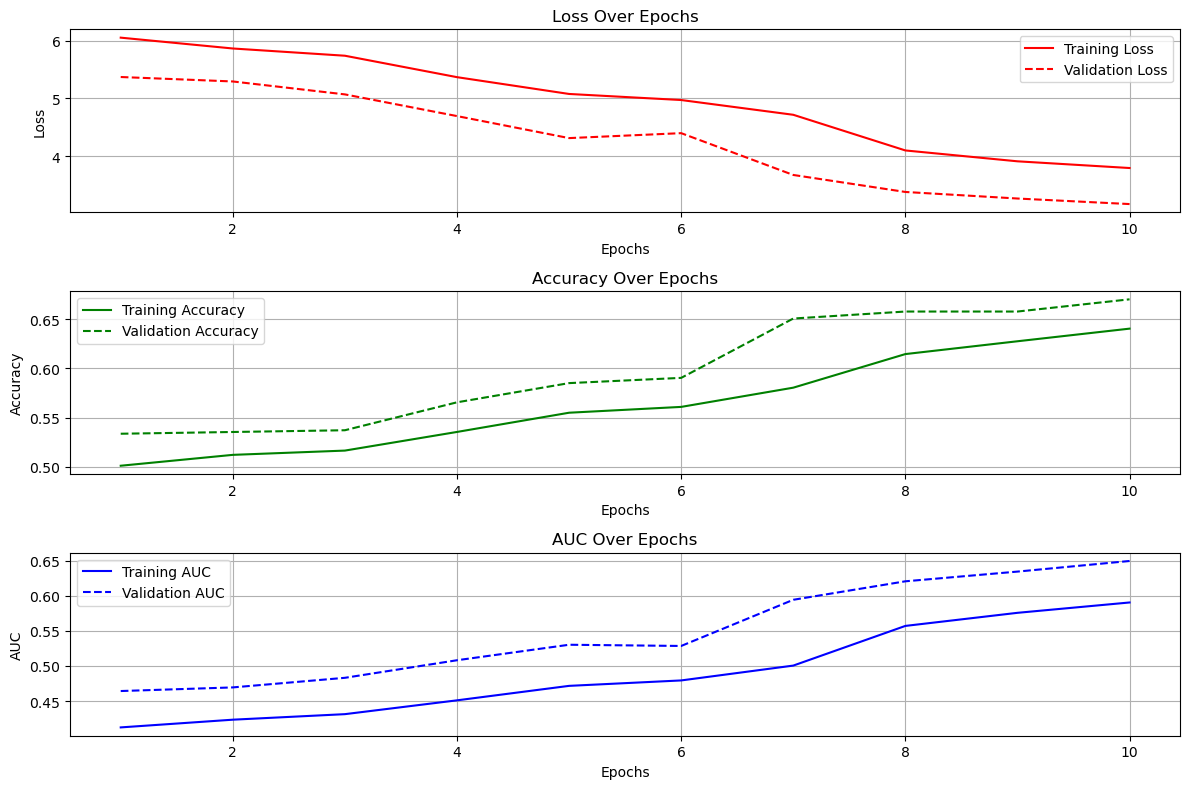

In [10]:
plot_loss_curves(history)

In [11]:
model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='relu'),
    ])

model_1.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy",tf.keras.metrics.AUC(name='auc')])

In [12]:
history_1 = model_1.fit(X_train, y_train, epochs=10, validation_data=(Valx_test, Valy_test))

Epoch 1/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6604 - auc: 0.5564 - loss: 1.6797 - val_accuracy: 0.6968 - val_auc: 0.6863 - val_loss: 0.7179
Epoch 2/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7155 - auc: 0.7347 - loss: 0.7028 - val_accuracy: 0.7358 - val_auc: 0.7323 - val_loss: 0.7486
Epoch 3/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7415 - auc: 0.7709 - loss: 0.6283 - val_accuracy: 0.7163 - val_auc: 0.7429 - val_loss: 0.6756
Epoch 4/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7455 - auc: 0.7807 - loss: 0.5820 - val_accuracy: 0.7553 - val_auc: 0.7639 - val_loss: 0.6878
Epoch 5/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7478 - auc: 0.7879 - loss: 0.5760 - val_accuracy: 0.7465 - val_auc: 0.7623 - val_loss: 0.6494
Epoch 6/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7625 - auc: 0.7956 - loss: 0.5294 - val_accuracy: 0.7482 - val_auc: 0.7661 - val_loss: 0.5564
Epoch 7/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 

In [13]:
print_metrics(Valx_test, Valy_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6680 - auc: 0.6546 - loss: 3.0732
Test Accuracy: 0.6702127456665039
Test AUC: 0.6494770050048828


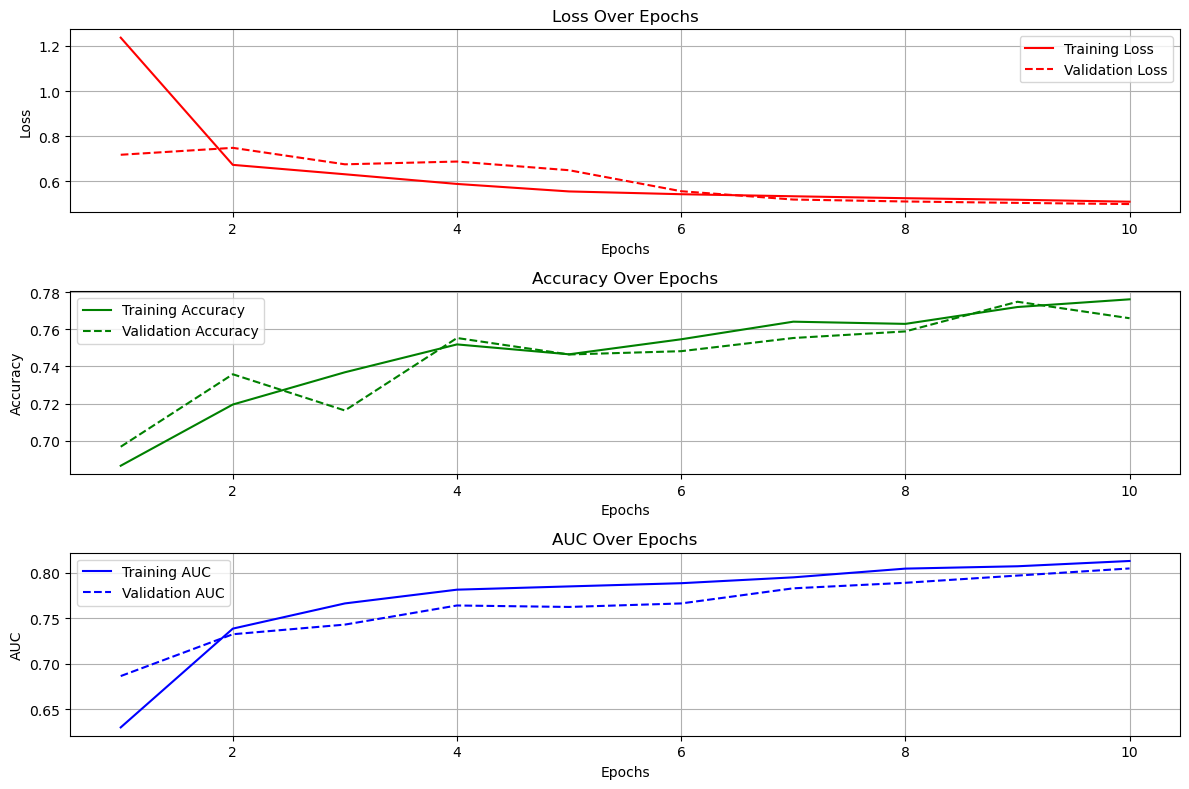

In [14]:
plot_loss_curves(history_1)

In [15]:
model_2 = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='relu'),
    ])

model_2.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy",tf.keras.metrics.AUC(name='auc')])

In [16]:
history_2 = model_2.fit(X_train, y_train, epochs=50, validation_data=(Valx_test, Valy_test))

Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6177 - auc: 0.5991 - loss: 4.0618 - val_accuracy: 0.6862 - val_auc: 0.6397 - val_loss: 3.0892
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6759 - auc: 0.6486 - loss: 2.9758 - val_accuracy: 0.7145 - val_auc: 0.7124 - val_loss: 2.5329
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7226 - auc: 0.7206 - loss: 2.3418 - val_accuracy: 0.7553 - val_auc: 0.7189 - val_loss: 2.0451
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7363 - auc: 0.7033 - loss: 1.9949 - val_accuracy: 0.7695 - val_auc: 0.7369 - val_loss: 1.9445
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7420 - auc: 0.7092 - loss: 1.9381 - val_accuracy: 0.7801 - val_auc: 0.7346 - val_loss: 1.8202
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7533 - auc: 0.7290 - loss: 1.8050 - val_accuracy: 0.7855 - val_auc: 0.7397 - val_loss: 1.7652
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 

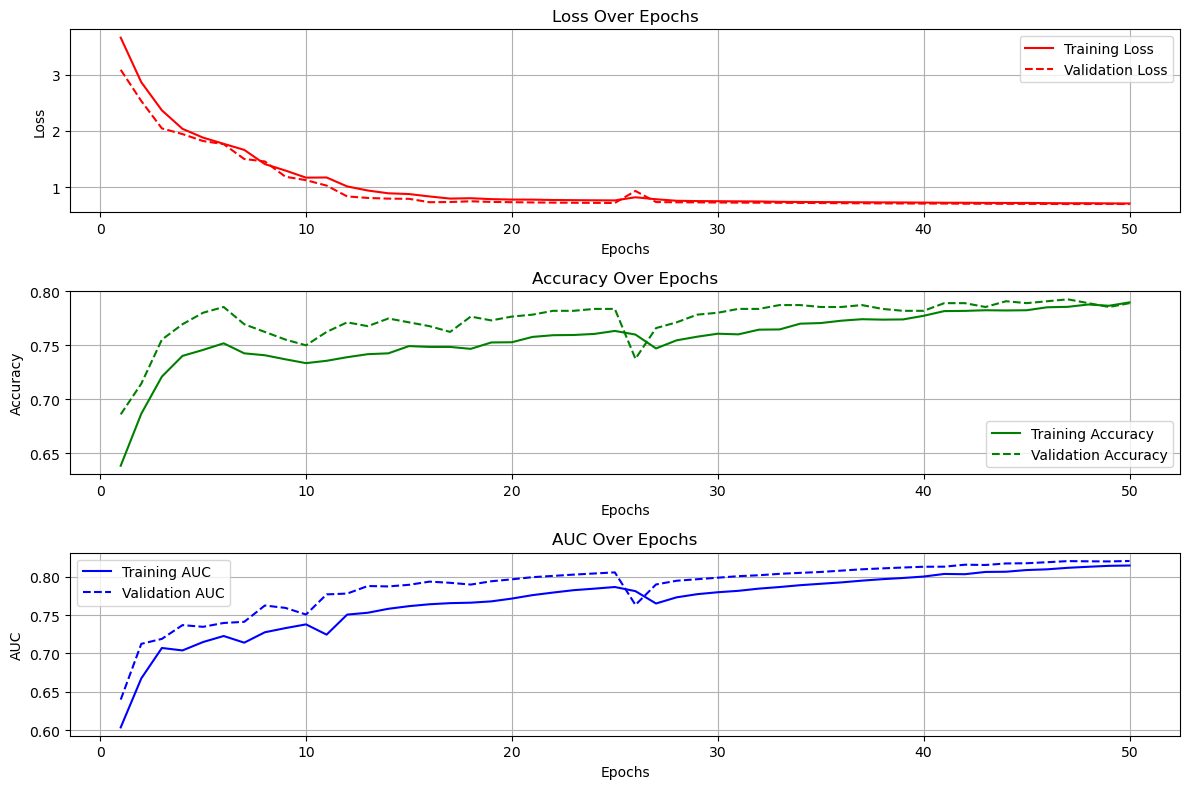

In [17]:
plot_loss_curves(history_2)

In [19]:
model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='relu'),
    ])

model_3.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy",tf.keras.metrics.AUC(name='auc')])

In [20]:
history_3 = model_3.fit(X_train, y_train, epochs=20, validation_data=(Valx_test, Valy_test))

Epoch 1/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7299 - auc: 0.6581 - loss: 1.2392 - val_accuracy: 0.7482 - val_auc: 0.7644 - val_loss: 0.6285
Epoch 2/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7577 - auc: 0.7825 - loss: 0.6035 - val_accuracy: 0.7606 - val_auc: 0.7901 - val_loss: 0.5474
Epoch 3/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7761 - auc: 0.7993 - loss: 0.5654 - val_accuracy: 0.7677 - val_auc: 0.8057 - val_loss: 0.5198
Epoch 4/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7915 - auc: 0.8316 - loss: 0.4765 - val_accuracy: 0.7766 - val_auc: 0.8196 - val_loss: 0.4986
Epoch 5/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7826 - auc: 0.8177 - loss: 0.4807 - val_accuracy: 0.7890 - val_auc: 0.8275 - val_loss: 0.4879
Epoch 6/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7869 - auc: 0.8318 - loss: 0.4629 - val_accuracy: 0.7872 - val_auc: 0.8289 - val_loss: 0.4879
Epoch 7/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 

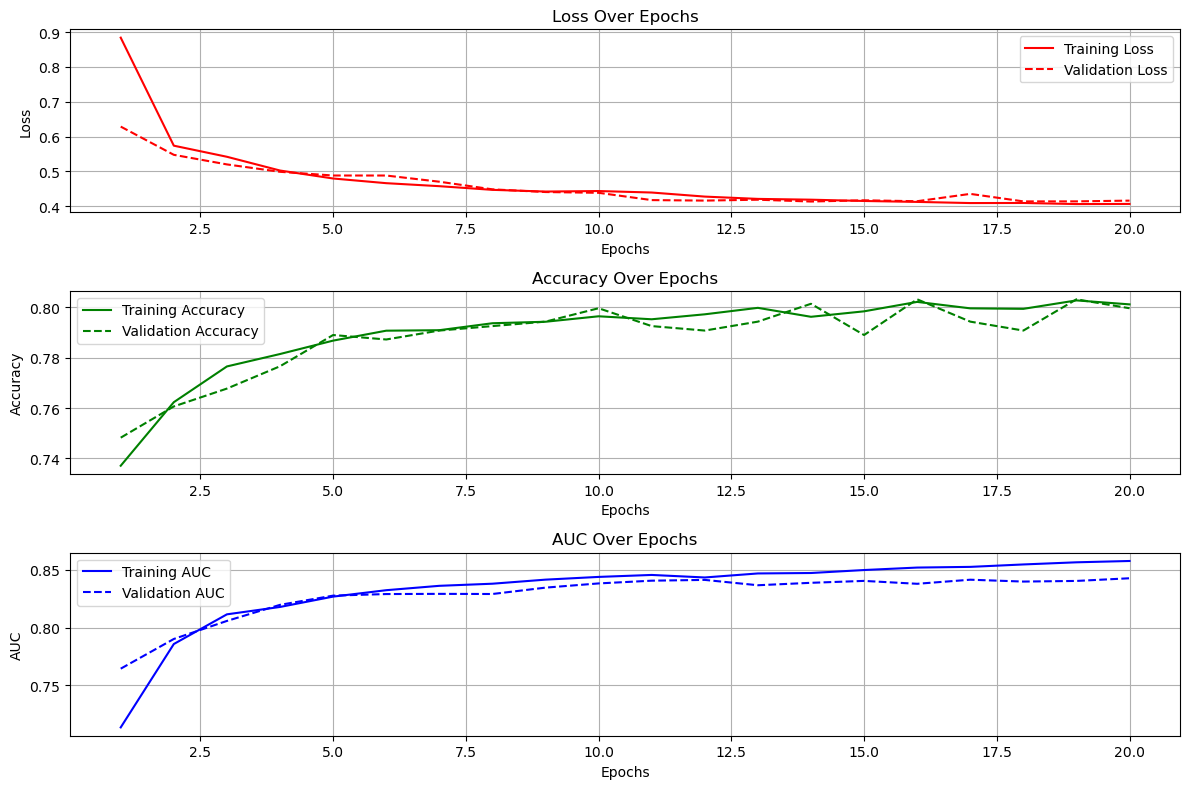

In [21]:
plot_loss_curves(history_3)

In [22]:
model_4 = tf.keras.Sequential([
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='relu'),
    ])

model_4.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy",tf.keras.metrics.AUC(name='auc')])

In [23]:
history_4 = model_4.fit(X_train, y_train, epochs=20, validation_data=(Valx_test, Valy_test))

Epoch 1/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7268 - auc: 0.4830 - loss: 1.7393 - val_accuracy: 0.7287 - val_auc: 0.5794 - val_loss: 0.6355
Epoch 2/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7371 - auc: 0.6681 - loss: 0.5849 - val_accuracy: 0.7323 - val_auc: 0.7107 - val_loss: 0.5228
Epoch 3/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7413 - auc: 0.7399 - loss: 0.5322 - val_accuracy: 0.7677 - val_auc: 0.7695 - val_loss: 0.4839
Epoch 4/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7707 - auc: 0.7839 - loss: 0.4828 - val_accuracy: 0.7784 - val_auc: 0.8025 - val_loss: 0.4798
Epoch 5/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7884 - auc: 0.8208 - loss: 0.4538 - val_accuracy: 0.7766 - val_auc: 0.8062 - val_loss: 0.4591
Epoch 6/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7881 - auc: 0.8078 - loss: 0.4578 - val_accuracy: 0.7801 - val_auc: 0.7958 - val_loss: 0.4687
Epoch 7/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 

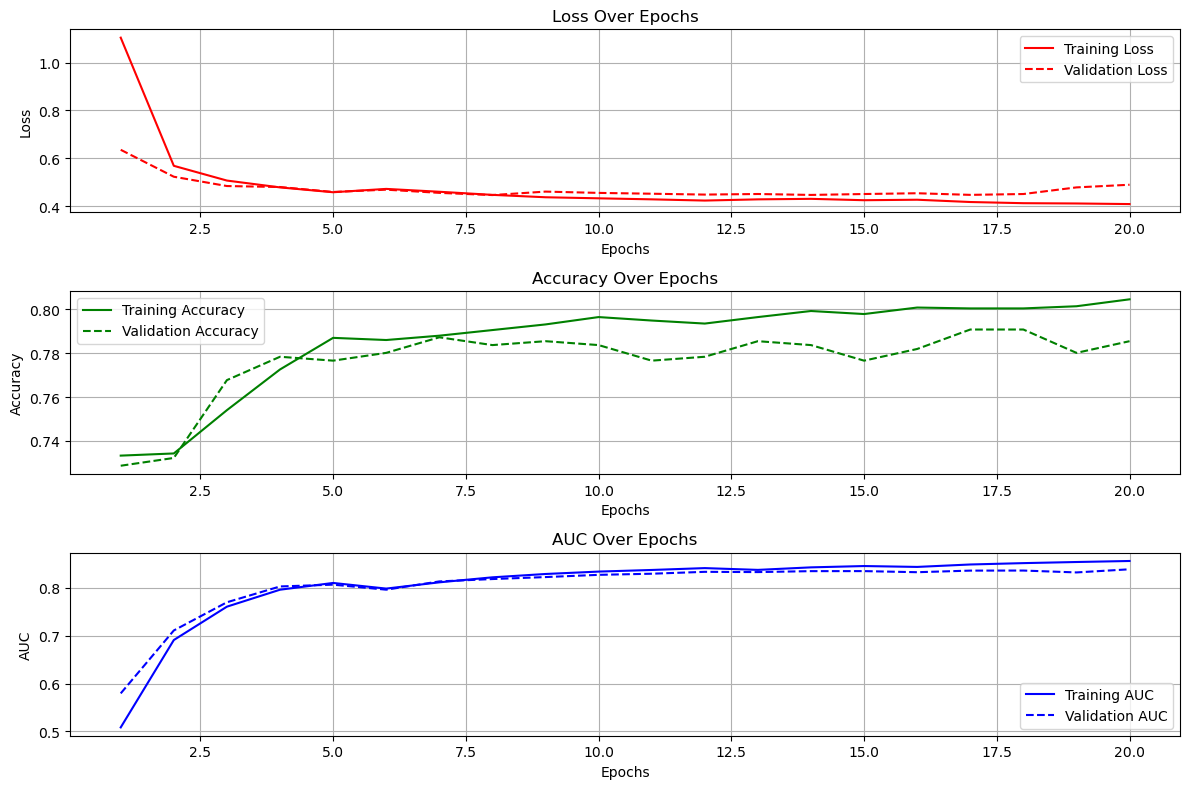

In [24]:
plot_loss_curves(history_4)

In [25]:
model_5 = tf.keras.Sequential([
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

model_5.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy",tf.keras.metrics.AUC(name='auc')])

In [26]:
history_5 = model_5.fit(X_train, y_train, epochs=20, validation_data=(Valx_test, Valy_test))

Epoch 1/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6007 - auc: 0.5764 - loss: 0.6224 - val_accuracy: 0.7589 - val_auc: 0.8177 - val_loss: 0.4527
Epoch 2/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7739 - auc: 0.8073 - loss: 0.4665 - val_accuracy: 0.8014 - val_auc: 0.8355 - val_loss: 0.4257
Epoch 3/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8015 - auc: 0.8395 - loss: 0.4234 - val_accuracy: 0.8050 - val_auc: 0.8382 - val_loss: 0.4210
Epoch 4/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8058 - auc: 0.8492 - loss: 0.4133 - val_accuracy: 0.7979 - val_auc: 0.8366 - val_loss: 0.4242
Epoch 5/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8047 - auc: 0.8491 - loss: 0.4092 - val_accuracy: 0.7943 - val_auc: 0.8372 - val_loss: 0.4224
Epoch 6/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8060 - auc: 0.8492 - loss: 0.4124 - val_accuracy: 0.8103 - val_auc: 0.8373 - val_loss: 0.4205
Epoch 7/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 

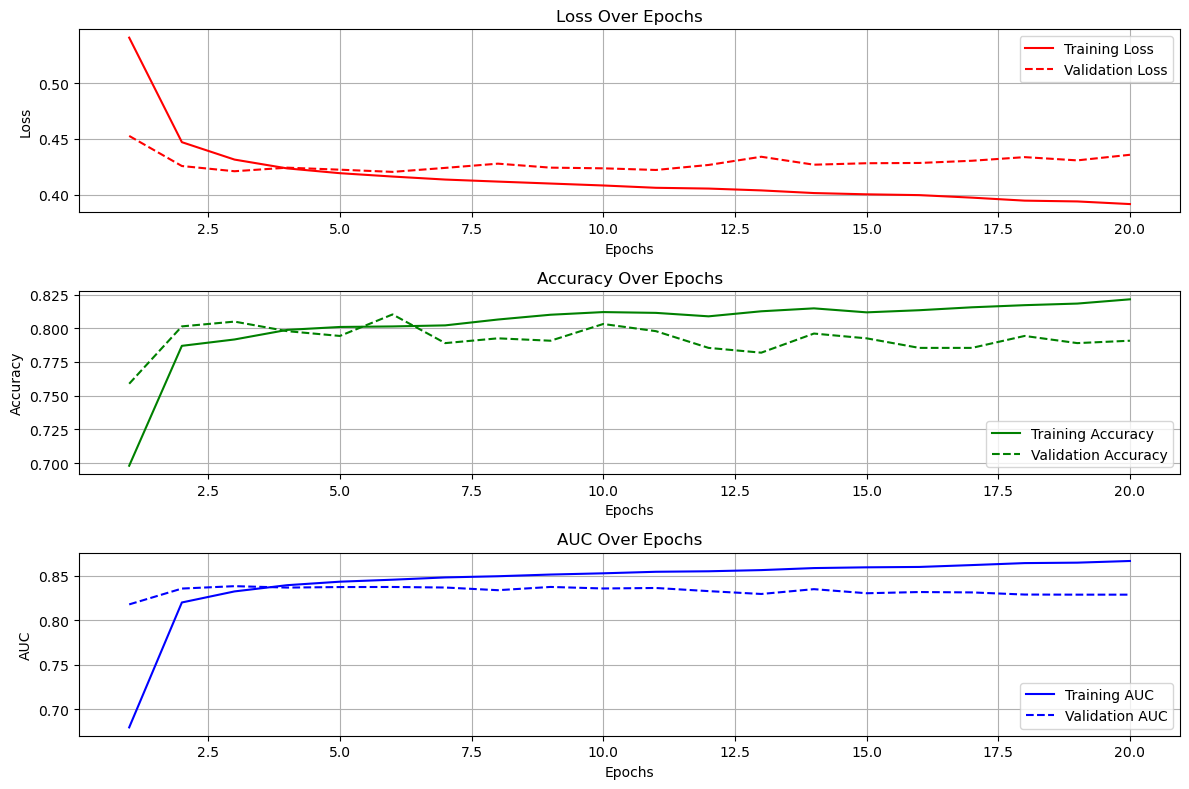

In [27]:
plot_loss_curves(history_5)

In [29]:
model_6 = tf.keras.Sequential([
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

model_6.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy",tf.keras.metrics.AUC(name='auc')])

In [30]:
history_6 = model_6.fit(X_train, y_train, epochs=20, validation_data=(Valx_test, Valy_test))

Epoch 1/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6267 - auc: 0.6782 - loss: 0.6734 - val_accuracy: 0.7535 - val_auc: 0.7766 - val_loss: 0.5161
Epoch 2/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7504 - auc: 0.7859 - loss: 0.4999 - val_accuracy: 0.7606 - val_auc: 0.8069 - val_loss: 0.4632
Epoch 3/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7801 - auc: 0.8043 - loss: 0.4633 - val_accuracy: 0.7766 - val_auc: 0.8239 - val_loss: 0.4393
Epoch 4/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7731 - auc: 0.8112 - loss: 0.4603 - val_accuracy: 0.7926 - val_auc: 0.8313 - val_loss: 0.4313
Epoch 5/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7779 - auc: 0.8219 - loss: 0.4497 - val_accuracy: 0.7872 - val_auc: 0.8332 - val_loss: 0.4271
Epoch 6/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7960 - auc: 0.8311 - loss: 0.4324 - val_accuracy: 0.7979 - val_auc: 0.8388 - val_loss: 0.4233
Epoch 7/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 

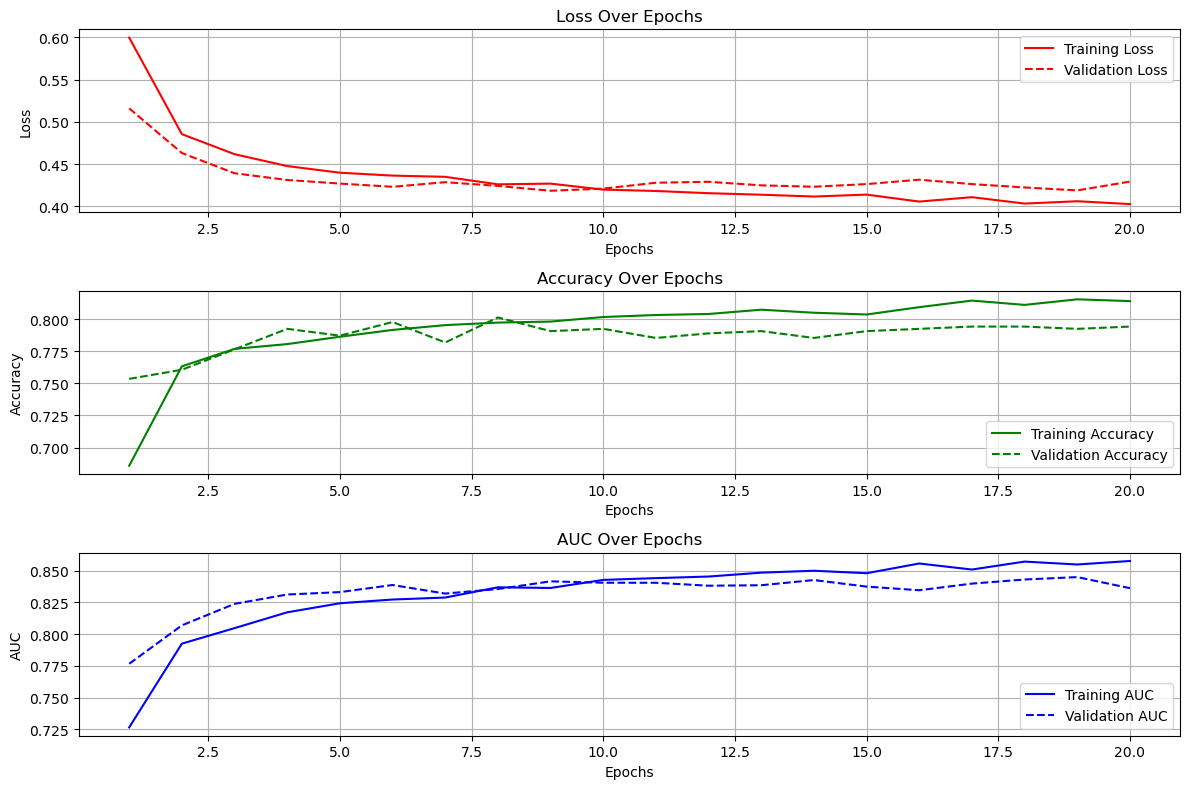

In [31]:
plot_loss_curves(history_6)

In [32]:
model_7 = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

model_7.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy",tf.keras.metrics.AUC(name='auc')])

In [33]:
history_7 = model_7.fit(X_train, y_train, epochs=20, validation_data=(Valx_test, Valy_test))

Epoch 1/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6777 - auc: 0.6866 - loss: 1.0701 - val_accuracy: 0.8067 - val_auc: 0.8289 - val_loss: 0.8025
Epoch 2/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7633 - auc: 0.7813 - loss: 0.7903 - val_accuracy: 0.8050 - val_auc: 0.8452 - val_loss: 0.6441
Epoch 3/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7938 - auc: 0.8213 - loss: 0.6365 - val_accuracy: 0.8032 - val_auc: 0.8497 - val_loss: 0.5678
Epoch 4/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7857 - auc: 0.8201 - loss: 0.5762 - val_accuracy: 0.7837 - val_auc: 0.8467 - val_loss: 0.5233
Epoch 5/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7801 - auc: 0.8251 - loss: 0.5401 - val_accuracy: 0.7979 - val_auc: 0.8507 - val_loss: 0.4927
Epoch 6/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7846 - auc: 0.8242 - loss: 0.5126 - val_accuracy: 0.8050 - val_auc: 0.8457 - val_loss: 0.4781
Epoch 7/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 

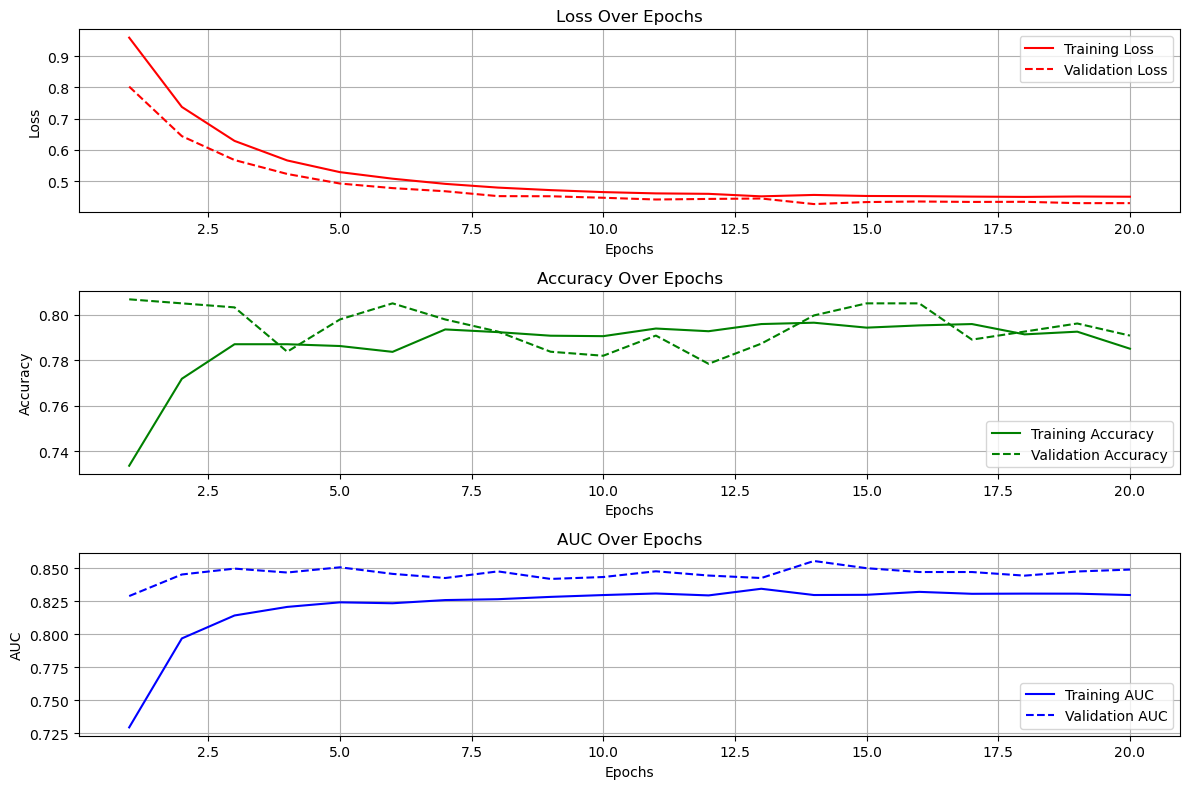

In [34]:
plot_loss_curves(history_7)

In [35]:
model_8 = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

model_8.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy",tf.keras.metrics.AUC(name='auc')])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [36]:
history_8 = model_8.fit(X_train, y_train, epochs=100, validation_data=(Valx_test, Valy_test), callbacks=[early_stopping],verbose=1)

Epoch 1/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7019 - auc: 0.7127 - loss: 1.6346 - val_accuracy: 0.7908 - val_auc: 0.8337 - val_loss: 1.2498
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7740 - auc: 0.8005 - loss: 1.1770 - val_accuracy: 0.7855 - val_auc: 0.8344 - val_loss: 0.9658
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7847 - auc: 0.8102 - loss: 0.9171 - val_accuracy: 0.7890 - val_auc: 0.8427 - val_loss: 0.7707
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7934 - auc: 0.8270 - loss: 0.7504 - val_accuracy: 0.7819 - val_auc: 0.8443 - val_loss: 0.6619
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7983 - auc: 0.8351 - loss: 0.6427 - val_accuracy: 0.7872 - val_auc: 0.8375 - val_loss: 0.5954
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8035 - auc: 0.8387 - loss: 0.5650 - val_accuracy: 0.7961 - val_auc: 0.8384 - val_loss: 0.5405
Epoch 7/100
159/159 ━━━━━━━━━━━━━━

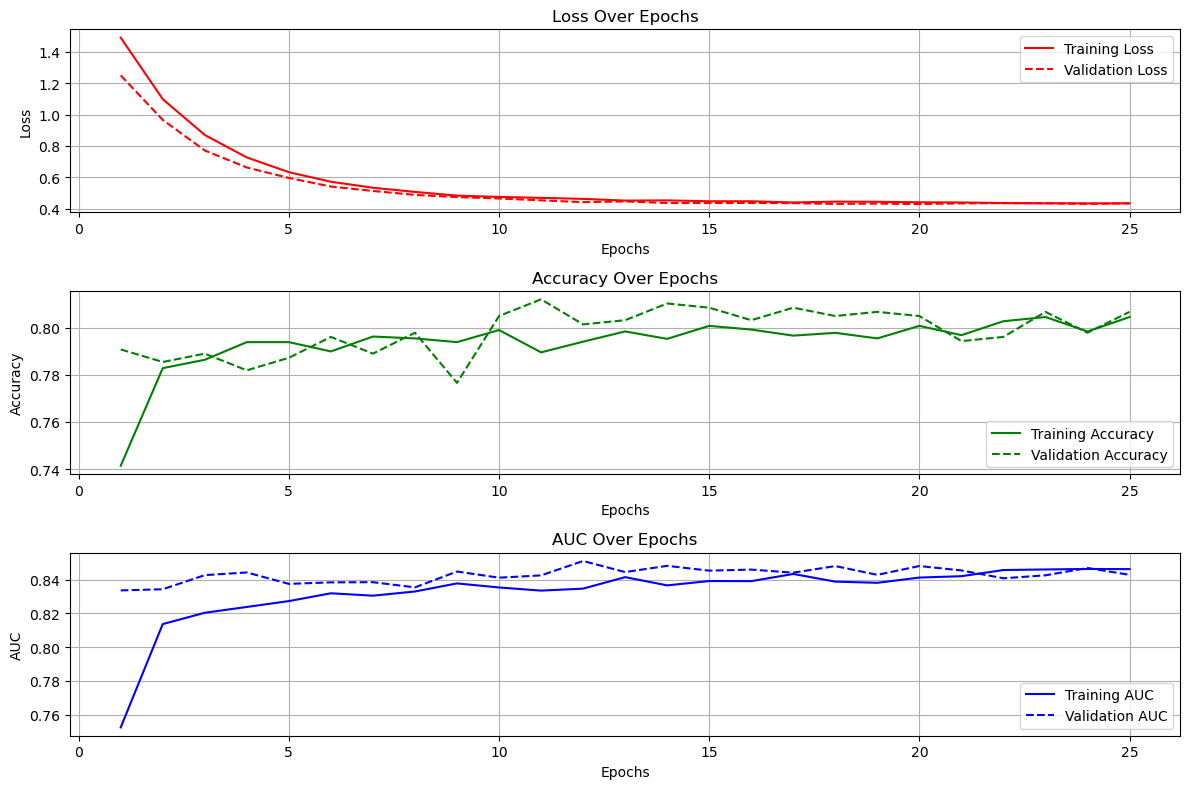

In [37]:
plot_loss_curves(history_8)

In [38]:
model_9 = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

model_9.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy",tf.keras.metrics.AUC(name='auc')])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [39]:
history_9 = model_9.fit(X_train, y_train, epochs=100, validation_data=(Valx_test, Valy_test), callbacks=[early_stopping],verbose=0)

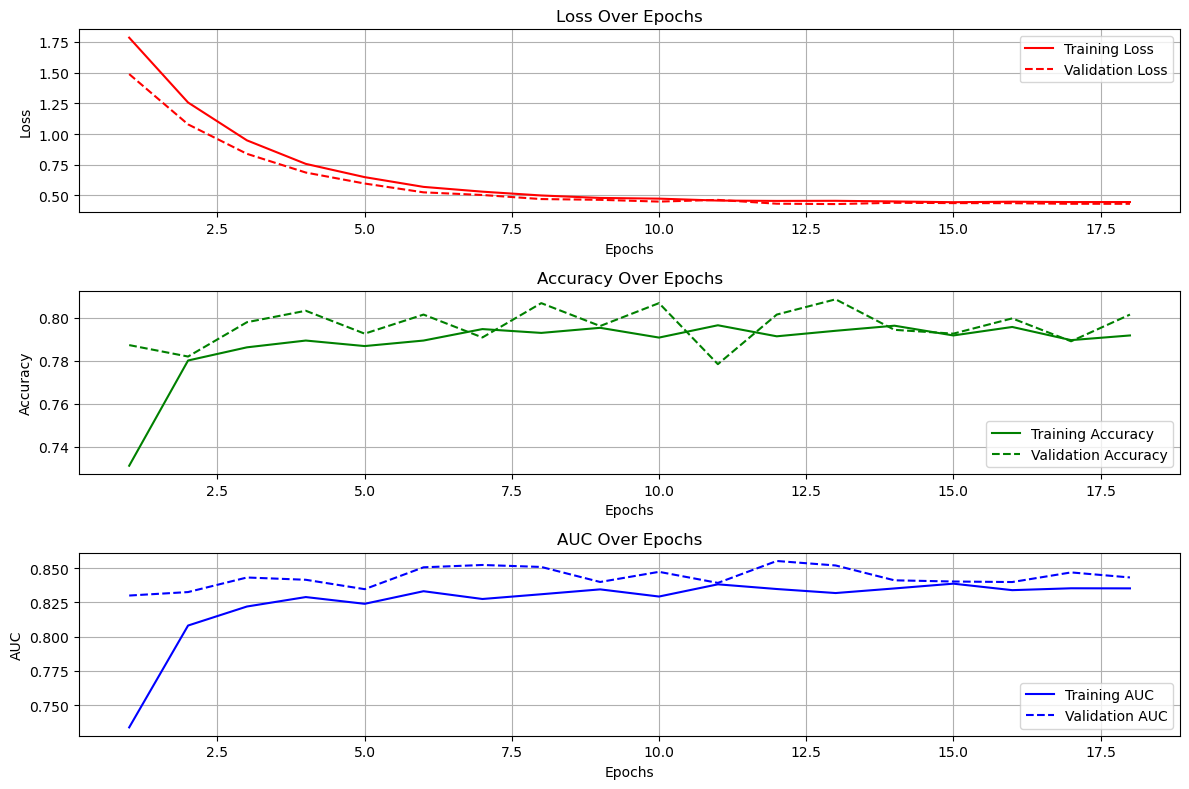

In [40]:
plot_loss_curves(history_9)

In [41]:
model_10 = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

model_10.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy",tf.keras.metrics.AUC(name='auc')])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [42]:
history_10 = model_10.fit(X_train, y_train, epochs=100, validation_data=(Valx_test, Valy_test), callbacks=[early_stopping],verbose=0)

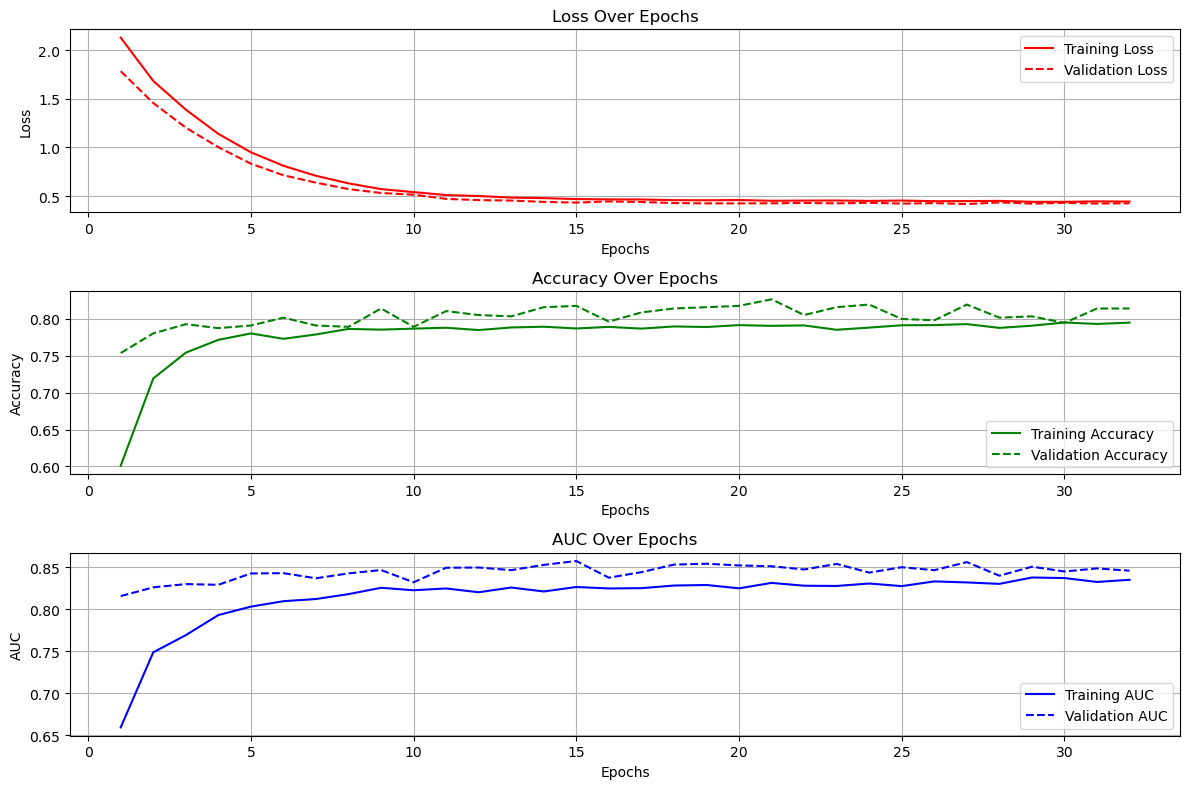

In [43]:
plot_loss_curves(history_10)

In [45]:
print_metrics(model_10,Valx_test,Valy_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8184 - auc: 0.8374 - loss: 0.4310
Test Accuracy: 0.8191489577293396
Test AUC: 0.8561590909957886


In [46]:
model_11 = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

model_11.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy",tf.keras.metrics.AUC(name='auc')])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [47]:
history_11 = model_11.fit(X_train, y_train, epochs=100, validation_data=(Valx_test, Valy_test), callbacks=[early_stopping],verbose=0)

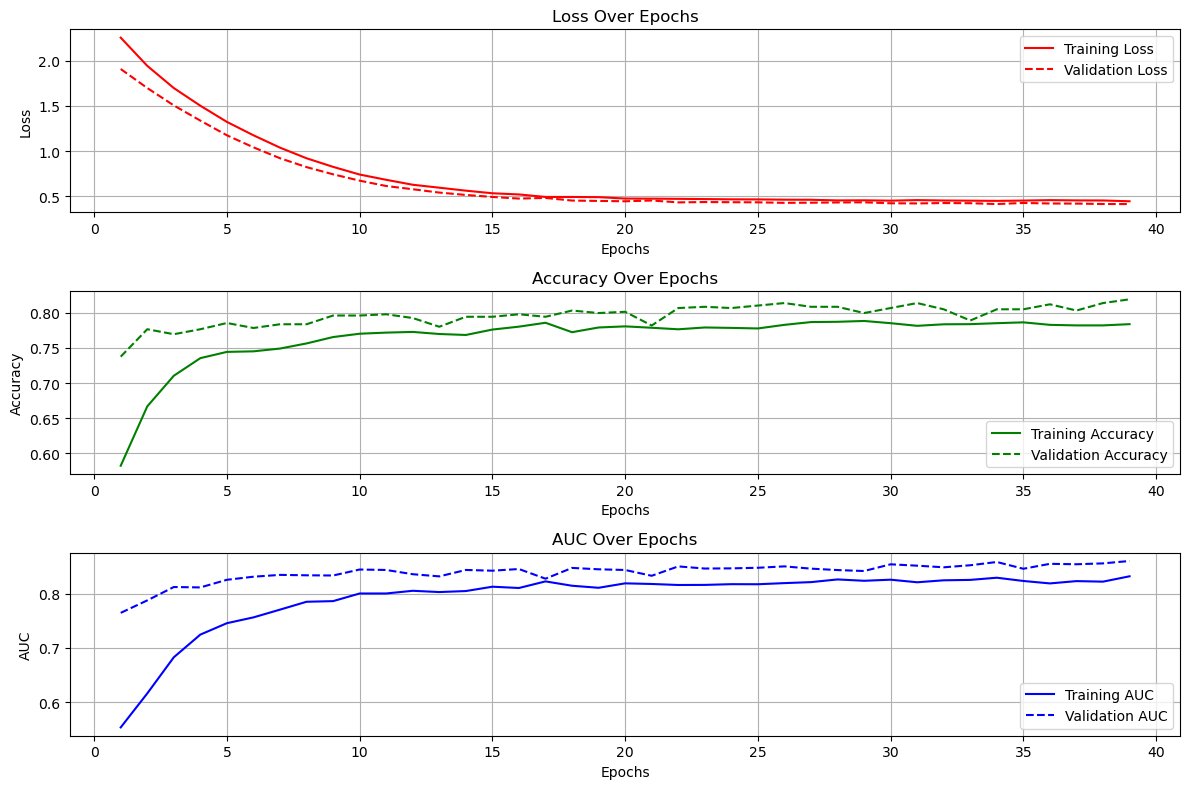

In [48]:
plot_loss_curves(history_11)

In [49]:
print_metrics(model_11,Valx_test,Valy_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - auc: 0.8365 - loss: 0.4358 
Test Accuracy: 0.804964542388916
Test AUC: 0.8583517074584961


In [51]:
X_test = data_clean_up(X_test)
model_11.evaluate(X_test,y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8141 - auc: 0.8652 - loss: 0.4152


[0.41956284642219543, 0.8097941875457764, 0.8567546606063843]

In [52]:
model_11.save('model_11.keras')